In [2]:
import pandas as pd

gdp = pd.read_csv("wb_gdp.csv")
gdp = gdp.drop(gdp.columns[1:4], axis=1)

In [105]:
import wbgapi as wb
# wb.series.info(q="gdp") # find dworld bank data by search term and ind the ID
wb.series.metadata.get("NY.GDP.MKTP.PP.CD") # load metadata
gdp_ppp = wb.data.DataFrame("NY.GDP.MKTP.PP.CD", 
                            ['AFR',
                             'MEA', 
                             'NAC',
                             'EUU',
                             'SAS',
                             ],
                            range(1990, 2024, 2)) 

In [132]:
gdp_ppp

,YR1990,YR1992,YR1994,YR1996,YR1998,YR2000,YR2002,YR2004,YR2006,YR2008,YR2010,YR2012,YR2014,YR2016,YR2018,YR2020,YR2022
economy,,,,,,,,,,,,,,,,,
EUU,6.231172e+12,6.753118e+12,7.212276e+12,7.833449e+12,8.548610e+12,9.478616e+12,1.042171e+13,1.122633e+13,1.272726e+13,1.429326e+13,1.451236e+13,1.543433e+13,1.644209e+13,1.806610e+13,1.995978e+13,2.056455e+13,2.443786e+13
MEA,1.977634e+12,2.379281e+12,2.579930e+12,2.887155e+12,3.219375e+12,3.639064e+12,3.909350e+12,4.628425e+12,5.426272e+12,6.230227e+12,6.703124e+12,7.459339e+12,7.572489e+12,7.029615e+12,7.823082e+12,7.883051e+12,9.745718e+12
NAC,6.525398e+12,7.107627e+12,7.945888e+12,8.787797e+12,9.859337e+12,1.115528e+13,1.190377e+13,1.330485e+13,1.506180e+13,1.611716e+13,1.641714e+13,1.772644e+13,1.917656e+13,2.037813e+13,2.239137e+13,2.286055e+13,2.771726e+13
SAS,1.441471e+12,1.644759e+12,1.901177e+12,2.256024e+12,2.539541e+12,2.950616e+12,3.317542e+12,4.007810e+12,4.938308e+12,5.721794e+12,6.705065e+12,7.878907e+12,8.728951e+12,9.919051e+12,1.154310e+13,1.180425e+13,1.523396e+13


In [137]:
gdp_ppp.reset_index()
gdp_ppp.columns
gdp_ppp

,economy,YR1990,YR1992,YR1994,YR1996,YR1998,YR2000,YR2002,YR2004,YR2006,YR2008,YR2010,YR2012,YR2014,YR2016,YR2018,YR2020,YR2022
0,EUU,6.231172e+12,6.753118e+12,7.212276e+12,7.833449e+12,8.548610e+12,9.478616e+12,1.042171e+13,1.122633e+13,1.272726e+13,1.429326e+13,1.451236e+13,1.543433e+13,1.644209e+13,1.806610e+13,1.995978e+13,2.056455e+13,2.443786e+13
1,MEA,1.977634e+12,2.379281e+12,2.579930e+12,2.887155e+12,3.219375e+12,3.639064e+12,3.909350e+12,4.628425e+12,5.426272e+12,6.230227e+12,6.703124e+12,7.459339e+12,7.572489e+12,7.029615e+12,7.823082e+12,7.883051e+12,9.745718e+12
2,NAC,6.525398e+12,7.107627e+12,7.945888e+12,8.787797e+12,9.859337e+12,1.115528e+13,1.190377e+13,1.330485e+13,1.506180e+13,1.611716e+13,1.641714e+13,1.772644e+13,1.917656e+13,2.037813e+13,2.239137e+13,2.286055e+13,2.771726e+13
3,SAS,1.441471e+12,1.644759e+12,1.901177e+12,2.256024e+12,2.539541e+12,2.950616e+12,3.317542e+12,4.007810e+12,4.938308e+12,5.721794e+12,6.705065e+12,7.878907e+12,8.728951e+12,9.919051e+12,1.154310e+13,1.180425e+13,1.523396e+13


In [144]:
df = gdp_ppp.melt(id_vars='economy', var_name='Year', value_name='gdp_ppp').sort_values('economy')
df.head()

,economy,Year,gdp_ppp
0,EUU,YR1990,6.231172e+12
32,EUU,YR2006,1.272726e+13
36,EUU,YR2008,1.429326e+13
20,EUU,YR2000,9.478616e+12
40,EUU,YR2010,1.451236e+13


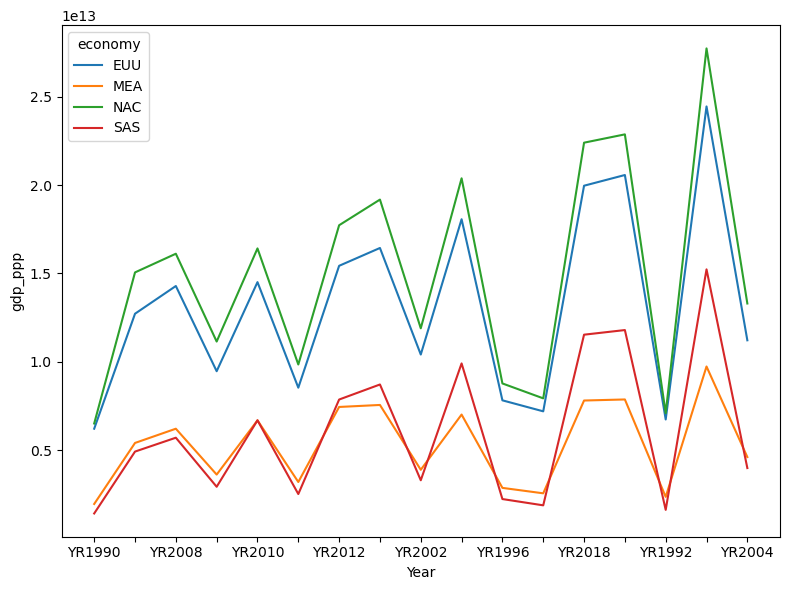

In [146]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(8, 6))
plot_ = sns.lineplot(data=df, x='Year', y='gdp_ppp', hue='economy', palette='tab10')

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.tight_layout()
plt.show()